In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K

Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
img_path = './creative_commons_elephant.jpg'

img = image.load_img(img_path, target_size=(224, 224))
input_data = image.img_to_array(img)
input_data = np.expand_dims(input_data, axis=0)
input_data = preprocess_input(input_data)

In [4]:
pred_value = model.predict(input_data)
print("Top index: {}".format(np.argmax(pred_value)))
top_3 = decode_predictions(pred_value, top=3)
print("Top 3 labels: {}".format(top_3))

Top index: 386
Top 3 labels: [[('n02504458', 'African_elephant', 0.91827565), ('n01871265', 'tusker', 0.06983923), ('n02408429', 'water_buffalo', 0.005880939)]]


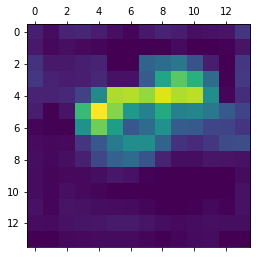

In [5]:
model_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(model_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=[0, 1, 2])
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([input_data])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

plt.matshow(heatmap)
plt.show()

In [0]:
img = cv2.imread(img_path)
heatmap_superimpose = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap_superimpose = np.uint8(255 * heatmap_superimpose)
heatmap_superimpose = cv2.applyColorMap(heatmap_superimpose, cv2.COLORMAP_JET)
superimposed_img = heatmap_superimpose * 0.4 + img

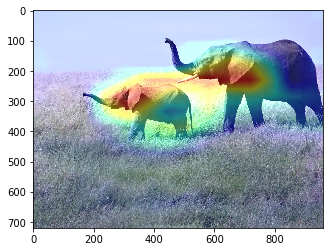

In [7]:
cv2.imwrite('./superimposed_img.jpg', superimposed_img)

plt_img = plt.imread('./superimposed_img.jpg')
plt.figure()
plt.imshow(plt_img)
plt.show()